In [1]:
import numpy as np 
from sklearn.model_selection import train_test_split
import sklearn

data =np.random.rand(100000,2)
for x  in range(100000):
  for y in range(2):
    if data[x,y]>=.5:
      data[x,y]=1
    else:
      data[x,y]=0


In [2]:
# xor gate
target = np.random.rand(100000)
for x  in range(100000):
    if data[x,0]==data[x,1]:
      target[x]=0
    else:
      target[x]=1
t= target.reshape(-1,1)
t

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [3]:


X = data
Y = target

X_traian_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_traian_val,Y_train_val, test_size=0.2, random_state=42)
print("{0:d} train observations with {1:d} columns".format(X_train.shape[0], X_train.shape[1]))
print("{0:d} train targets".format(len(X_train)))
print("{0:d} val observations with {1:d} columns".format(X_val.shape[0], X_val.shape[1]))
print("{0:d} val targets".format(len(X_val)))
print("{0:d} test observations with {1:d} columns".format(X_test.shape[0], X_test.shape[1]))
print("{0:d} test targets".format(len(X_test)))

64000 train observations with 2 columns
64000 train targets
16000 val observations with 2 columns
16000 val targets
20000 test observations with 2 columns
20000 test targets


In [12]:



class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, 
                                       (self.input_nodes, self.hidden_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))
        self.lr = learning_rate
        
        
        def sigmoid(x):
            return (1/(1+np.exp(-x))) # Replace 0 with your sigmoid calculation here
        self.activation_function = sigmoid
                    

    def train(self, X_train, Y_train):
        ''' Train the network on batch of features and targets. 
        
            Arguments
            ---------
            
            features: 2D array, each row is one data record, each column is a feature
            targets: 1D array of target values
        
        '''
        n_records = X_train.shape[0]
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        for X, y in zip(X_train, Y_train):
            
            final_outputs, hidden_outputs = self.forward_pass_train(X)  # Implement the forward pass function below
            # Implement the backproagation function below
            delta_weights_i_h, delta_weights_h_o = self.backpropagation(final_outputs, hidden_outputs, X, y, 
                                                                        delta_weights_i_h, delta_weights_h_o)
        self.update_weights(delta_weights_i_h, delta_weights_h_o, n_records)


    def forward_pass_train(self, X):
        ''' Implement forward pass here 
         
            Arguments
            ---------
            X: features batch
        '''
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer - Replace these values with your calculations.
        hidden_inputs = np.dot(X, self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer

        # TODO: Output layer - Replace these values with your calculations.
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
        final_outputs = final_inputs  # signals from final output layer
        
        return final_outputs, hidden_outputs

    def backpropagation(self, final_outputs, hidden_outputs, X, y, delta_weights_i_h, delta_weights_h_o):
        ''' Implement backpropagation
         
            Arguments
            ---------
            final_outputs: output from forward pass
            y: target (i.e. label) batch
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers
        '''
        #### Implement the backward pass here ####
        ### Backward pass ###

        error = y - final_outputs # Output layer error is the difference between desired target and actual output.
        
        #  Calculate the hidden layer's contribution to the error
        hidden_error = np.dot(error, self.weights_hidden_to_output.T)
        
        # TODO: Backpropagated error terms - Replace these values with your calculations.
        output_error_term = error
        
        hidden_error_term = hidden_error * hidden_outputs * (1 - hidden_outputs)
        
        # Weight step (input to hidden)
        delta_weights_i_h += hidden_error_term * X[:, None]
        # Weight step (hidden to output)
        delta_weights_h_o += output_error_term * hidden_outputs[:, None]

        return delta_weights_i_h, delta_weights_h_o

    def update_weights(self, delta_weights_i_h, delta_weights_h_o, n_records):
        ''' Update weights on gradient descent step
         
            Arguments
            ---------
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers
            n_records: number of records
        '''
        self.weights_hidden_to_output += self.lr * delta_weights_h_o / n_records # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += self.lr * delta_weights_i_h / n_records # update input-to-hidden weights with gradient descent step

    def run(self, features):
        ''' Run a forward pass through the network with input features 
        
            Arguments
            ---------
            features: 1D array of feature values
        '''
        
        #### Implement the forward pass here ####
        #  Hidden layer - replace these values with the appropriate calculations.
        hidden_inputs = np.dot(features, self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # Output layer - Replace these values with the appropriate calculations.
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer 
        
        return final_outputs

iterations =10
learning_rate = 0.05
hidden_nodes = 13
output_nodes = 1
N_i=2

In [13]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [14]:
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

In [15]:
losses = {'train':[], 'val':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set

                             
    network.train(X_train, Y_train)
    
    # Printing out the training progress
    train_loss = MSE(network.run(X_train).T, Y_train)
    val_loss  = MSE(network.run( X_val).T,  Y_val)
    
    #to plote it 
    losses['train'].append(train_loss)
    losses['val'].append(val_loss)
    print("the train error to iteration= " + str(train_loss) + "\n the val error to iteration= " +str(val_loss))

the train error to iteration= 0.6786966483836658
 the val error to iteration= 0.6906909682351379
the train error to iteration= 0.5544807689517647
 the val error to iteration= 0.5645804938694143
the train error to iteration= 0.4672340203647184
 the val error to iteration= 0.47575162001642796
the train error to iteration= 0.4059300450721553
 the val error to iteration= 0.4131254229923907
the train error to iteration= 0.36283723343153385
 the val error to iteration= 0.36892691568597547
the train error to iteration= 0.33253068620762427
 the val error to iteration= 0.3376952796130575
the train error to iteration= 0.31120249697163066
 the val error to iteration= 0.31559278872755175
the train error to iteration= 0.2961791658766838
 the val error to iteration= 0.2999211395838495
the train error to iteration= 0.28558342822808674
 the val error to iteration= 0.2887824055755775
the train error to iteration= 0.2780970518057975
 the val error to iteration= 0.28084112277739504


In [16]:
#test
test_loss  = MSE(network.run( X_test).T,  Y_test)
print("the test error to iteration= " + str(train_loss))

the test error to iteration= 0.2780970518057975


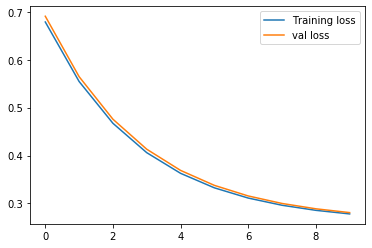

In [17]:
import matplotlib.pyplot as plt
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['val'], label='val loss')
plt.legend()
_ = plt.ylim()